O problema proposto envolve a utilização do conjunto de dados Boston Housing para resolver uma tarefa: utilizar regressão para estimar o preço dos imóveis.
- A variável alvo é a MEDV (preço médio dos imóveis)
- Defina avalie diferentes valores para K;
- Como regressor, utilize o algoritmo do KNN.
- A definição do valor de K deve ser baseada na escolha do modelo que apresenta os melhores resultados baseados nas métricas de MAE, MSE, RMSE e MAPE.
- Forneça uma visualização dos dados (matriz de correlação e pairplot) e uma discussão quanto aos resultados.

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic


| Variable | Description                                                                 |
|----------|-----------------------------------------------------------------------------|
| CRIM     | per capita crime rate by town                                              |
| ZN       | proportion of residential land zoned for lots over 25,000 sq.ft.           |
| INDUS    | proportion of non-retail business acres per town                           |
| CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)      |
| NOX      | nitric oxides concentration (parts per 10 million)                         |
| RM       | average number of rooms per dwelling                                       |
| AGE      | proportion of owner-occupied units built prior to 1940                     |
| DIS      | weighted distances to five Boston employment centres                       |
| RAD      | index of accessibility to radial highways                                  |
| TAX      | full-value property-tax rate per $10,000                                   |
| PTRATIO  | pupil-teacher ratio by town                                                |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town             |
| LSTAT    | % lower status of the population                                           |
| MEDV     | Median value of owner-occupied homes in $1000's                            |


In [641]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

data_df = pd.DataFrame(data)
data_df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTATUS", "MEDV"]

data_df

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\carli\AppData\Local\Temp\ipykernel_1300\3024970650.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATUS,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [642]:
target = data_df["MEDV"]


In [643]:
nan_values = data_df.isna().sum()
nan_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTATUS    0
MEDV       0
dtype: int64

In [644]:
null_values = data_df.isnull().sum()
null_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTATUS    0
MEDV       0
dtype: int64

In [645]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


features = data_df.drop(columns=["MEDV"])

scaler = MinMaxScaler()

norm_columns = scaler.fit_transform(features)

norm_df = pd.DataFrame(norm_columns, columns=features.columns)
norm_df["MEDV"] = data_df["MEDV"]
norm_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTATUS,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [646]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTATUS  506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


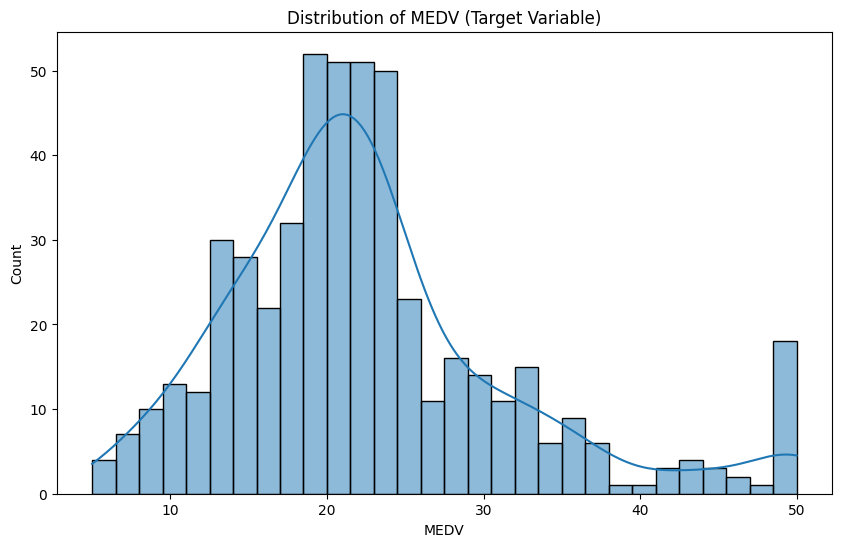

In [647]:
# distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(norm_df["MEDV"], bins=30, kde=True)
plt.title("Distribution of MEDV (Target Variable)")
plt.show()

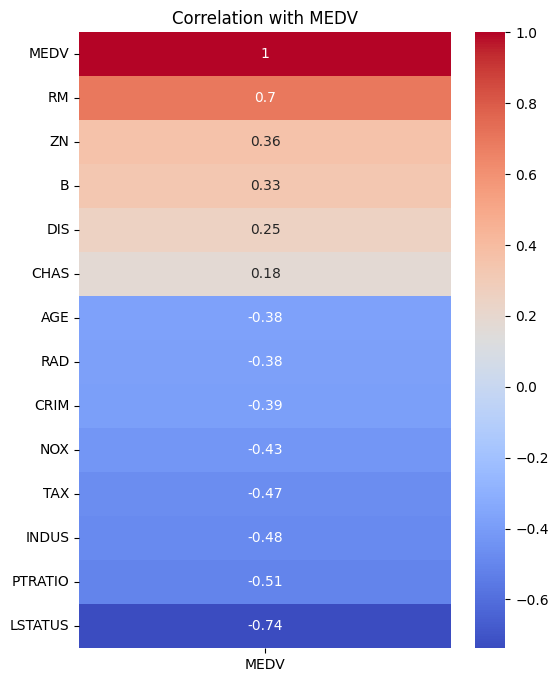

In [648]:
correlation_matrix = norm_df.corr()

plt.figure(figsize=(6, 8))
sns.heatmap(correlation_matrix[["MEDV"]].sort_values(by="MEDV", ascending=False), annot=True, cbar=True, cmap="coolwarm")

plt.title("Correlation with MEDV")
plt.show()

In [649]:
high_corr_features = ['RM', 'TAX', 'PTRATIO', 'LSTATUS', 'INDUS']

In [650]:
corr_df = norm_df[high_corr_features + ["MEDV"]]
corr_df.head()

,RM,TAX,PTRATIO,LSTATUS,INDUS,MEDV
0,0.577505,0.208015,0.287234,0.089680,0.067815,24.0
1,0.547998,0.104962,0.553191,0.204470,0.242302,21.6
2,0.694386,0.104962,0.553191,0.063466,0.242302,34.7
3,0.658555,0.066794,0.648936,0.033389,0.063050,33.4
4,0.687105,0.066794,0.648936,0.099338,0.063050,36.2


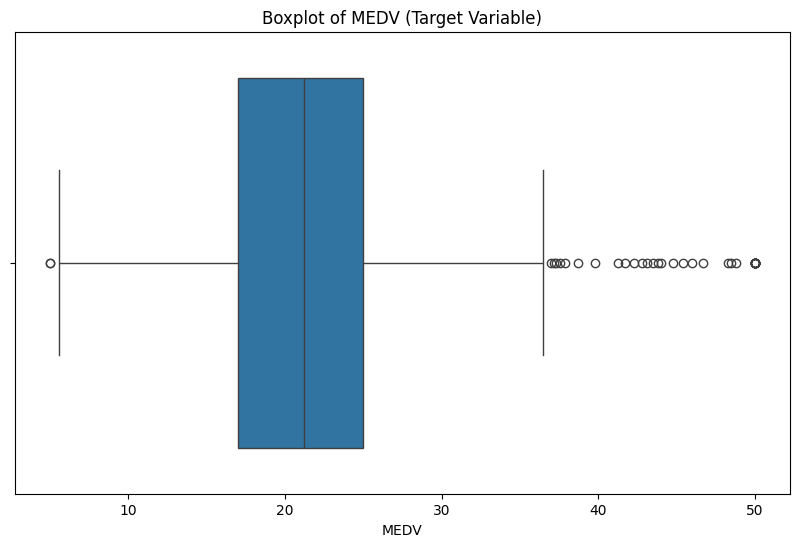

In [651]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=corr_df["MEDV"])
plt.title("Boxplot of MEDV (Target Variable)")
plt.show()

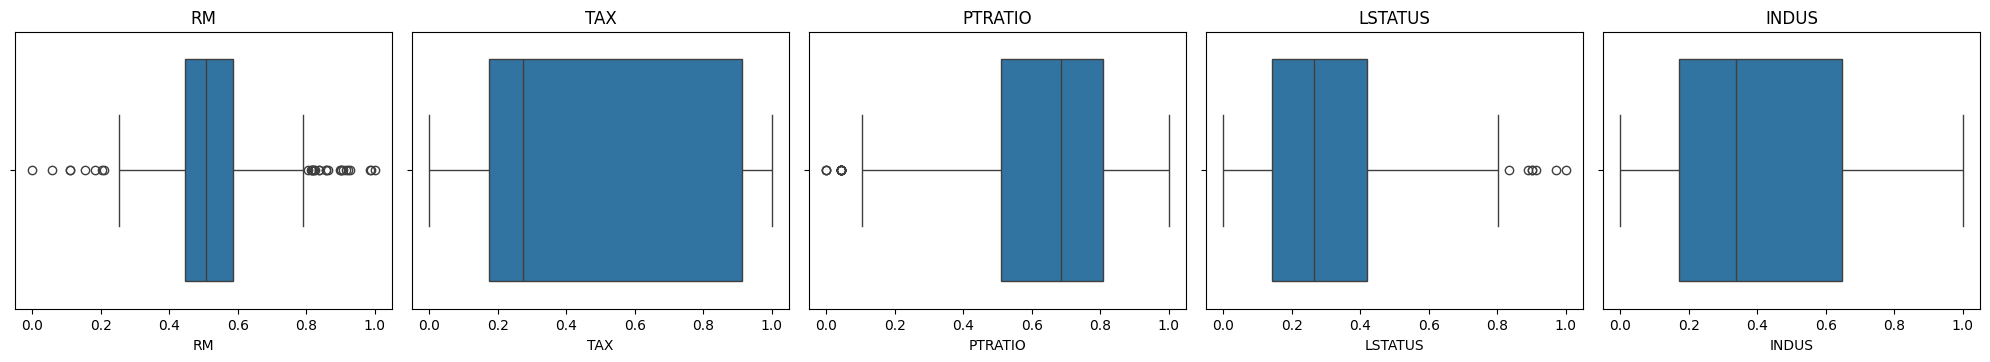

In [652]:
# Ensure column names in corr_df are unique
corr_df = corr_df.loc[:, ~corr_df.columns.duplicated()]

plt.figure(figsize=(20, 10))
for i, col in enumerate(high_corr_features, start=1):  # Start enumeration from 1
    plt.subplot(3, 5, i)
    sns.boxplot(x=corr_df[col])
    plt.title(col)
plt.tight_layout()

In [653]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


filtered_df = remove_outliers_iqr(corr_df, high_corr_features)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       460 non-null    float64
 1   TAX      460 non-null    float64
 2   PTRATIO  460 non-null    float64
 3   LSTATUS  460 non-null    float64
 4   INDUS    460 non-null    float64
 5   MEDV     460 non-null    float64
dtypes: float64(6)
memory usage: 25.2 KB


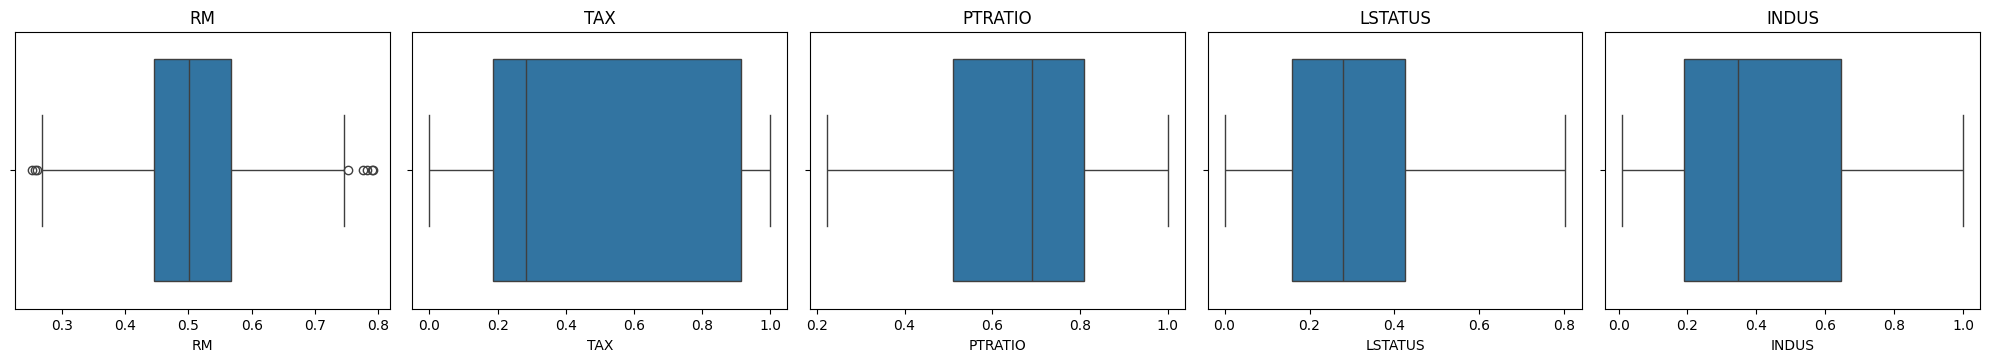

In [654]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(high_corr_features, start=1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=filtered_df[col])
    plt.title(col)
plt.tight_layout()

In [655]:
ml_data = filtered_df.loc[:, high_corr_features]
ml_data["MEDV"] = filtered_df["MEDV"]

ml_data.head()

,RM,TAX,PTRATIO,LSTATUS,INDUS,MEDV
0,0.577505,0.208015,0.287234,0.089680,0.067815,24.0
1,0.547998,0.104962,0.553191,0.204470,0.242302,21.6
2,0.694386,0.104962,0.553191,0.063466,0.242302,34.7
3,0.658555,0.066794,0.648936,0.033389,0.063050,33.4
4,0.687105,0.066794,0.648936,0.099338,0.063050,36.2


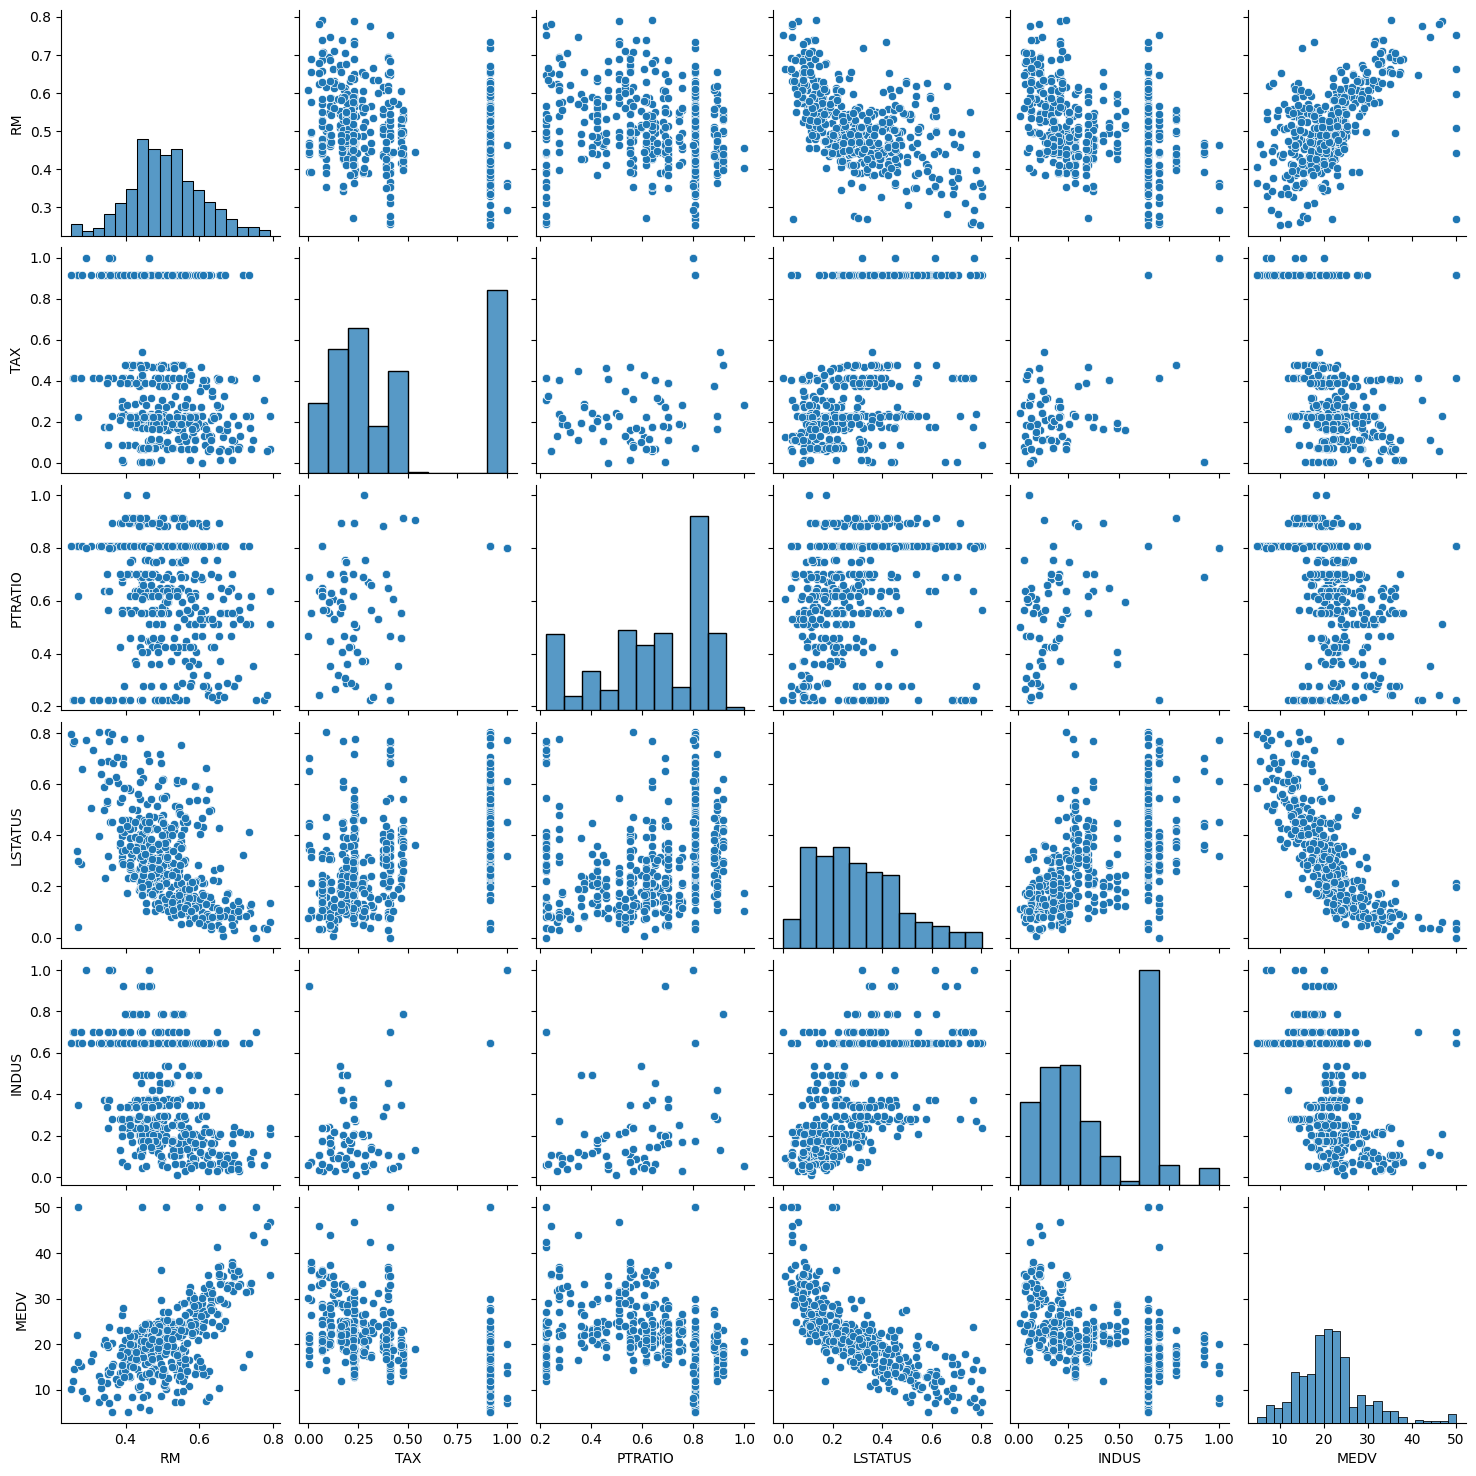

In [656]:
sns.pairplot(ml_data)
plt.show()

In [667]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN


X = ml_data.drop(columns=["MEDV"])
y = ml_data["MEDV"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [668]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def define_Knumber():
    k_values = range(1, 100)
    results = []
    
    
    for k in k_values:
        knn = KNN(n_neighbors=k, weights="distance")
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100

        
        
        results.append((k, mae, mse, rmse, mape))
        
    return pd.DataFrame(results, columns=["K", "MAE", "MSE", "RMSE", "MAPE"])


In [669]:
define_Knumber_df = define_Knumber()
define_Knumber_df.head().sort_values(by="MAE", ascending=True)

,K,MAE,MSE,RMSE,MAPE
3,4,2.190983,10.358201,3.218416,11.499858
4,5,2.210318,9.894586,3.145566,11.662423
2,3,2.250739,11.196852,3.346170,11.909318
1,2,2.423223,13.601651,3.688042,12.999575
0,1,2.689855,19.334493,4.397100,14.698095


In [670]:
best_k = define_Knumber_df.loc[define_Knumber_df["MAE"].idxmin(), "K"]
print(f"Best K value: {best_k}")

knn_final = KNN(n_neighbors=best_k, weights='distance')
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

Best K value: 4


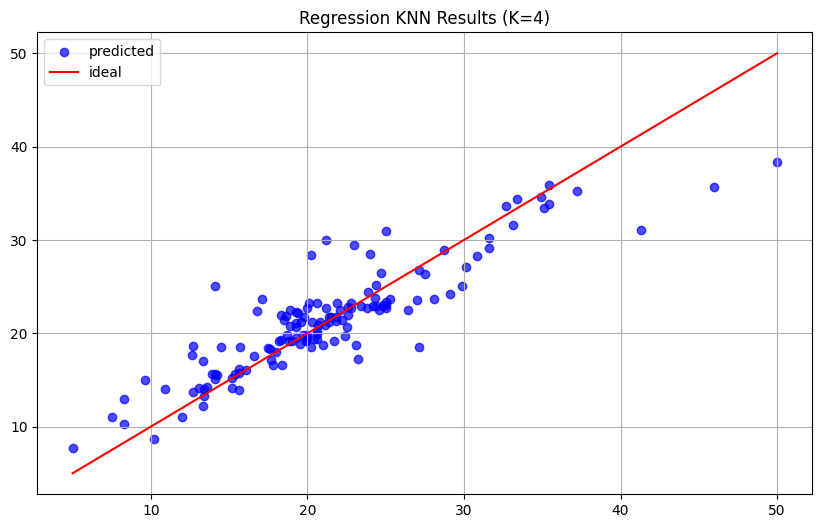

In [671]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='ideal')
plt.title(f'Regression KNN Results (K={best_k})')
plt.legend()
plt.grid(True)
plt.show()